In [1]:
import os, gzip
import matplotlib.pyplot as plt
import pysam

import lakeview as lv

plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 100

## Download BAM files

In [2]:
CHROMOSOME = "chr14"
START = 104586347
END = 107043718
REGION = f"{CHROMOSOME}:{START}-{END}"


PACBIO_BAM_URL = "ftp://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/data/AshkenazimTrio/HG002_NA24385_son/PacBio_CCS_15kb_20kb_chemistry2/GRCh38/HG002.SequelII.merged_15kb_20kb.pbmm2.GRCh38.haplotag.10x.bam"
PACBIO_BAI_URL = "ftp://ftp-trace.ncbi.nlm.nih.gov/ReferenceSamples/giab/data/AshkenazimTrio/HG002_NA24385_son/PacBio_CCS_15kb_20kb_chemistry2/GRCh38/HG002.SequelII.merged_15kb_20kb.pbmm2.GRCh38.haplotag.10x.bam.bai"
PACBIO_BAM_PATH = "data/PacBio_CCS.bam"
PACBIO_BAI_PATH = "data/PacBio_CCS.bam.bai"

lv.helpers.download_bam(PACBIO_BAM_URL, PACBIO_BAI_URL, REGION, PACBIO_BAM_PATH)

## Download GTF file

In [3]:
GENCODE_GTF_URL = "https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_41/gencode.v41.annotation.gtf.gz"
GENCODE_GTF_PATH = "data/gencode.v40.annotation.gtf.gz"
if not os.path.isfile(GENCODE_GTF_PATH):
    !wget {GENCODE_GTF_URL} -O {GENCODE_GTF_PATH}

## Load data

In [4]:
pacbio_painter = lv.SequenceAlignment.from_file(PACBIO_BAM_PATH, "rb")

In [5]:
with gzip.open(GENCODE_GTF_PATH, "rt") as f:
    gencode_painter = lv.GeneAnnotation.from_file(
        file_object=f,
        format="gtf",
        sequence_name=CHROMOSOME,
        start=START,
        end=END,
    )
gencode_painter.transcripts.sort(key=len, reverse=True)

## Plotting

/workspace/lakeview/src/lakeview/widget.py:54: UserWarning: Backend ipympl not activated. Current backend: module://matplotlib_inline.backend_inline. To enable additional interactive functionality, please activate ipympl using `%matplotlib widget`.
  warn(


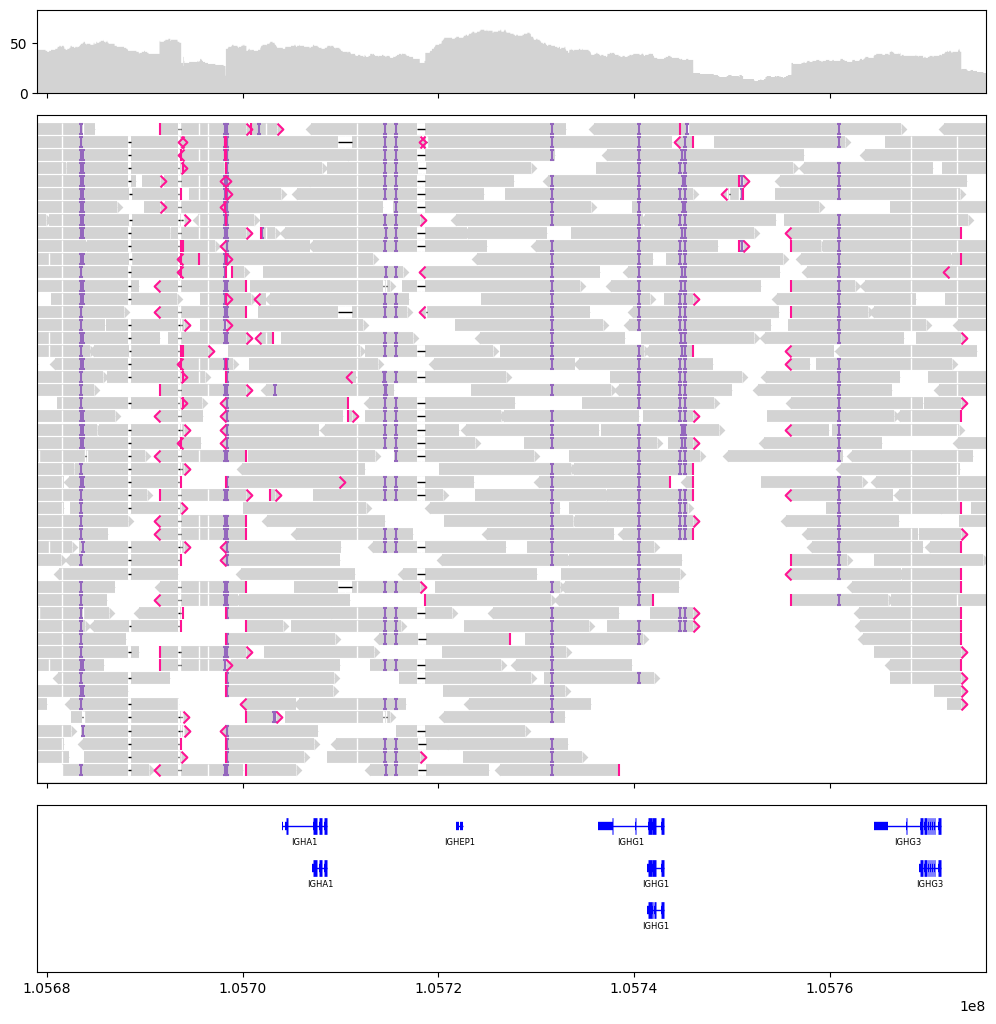

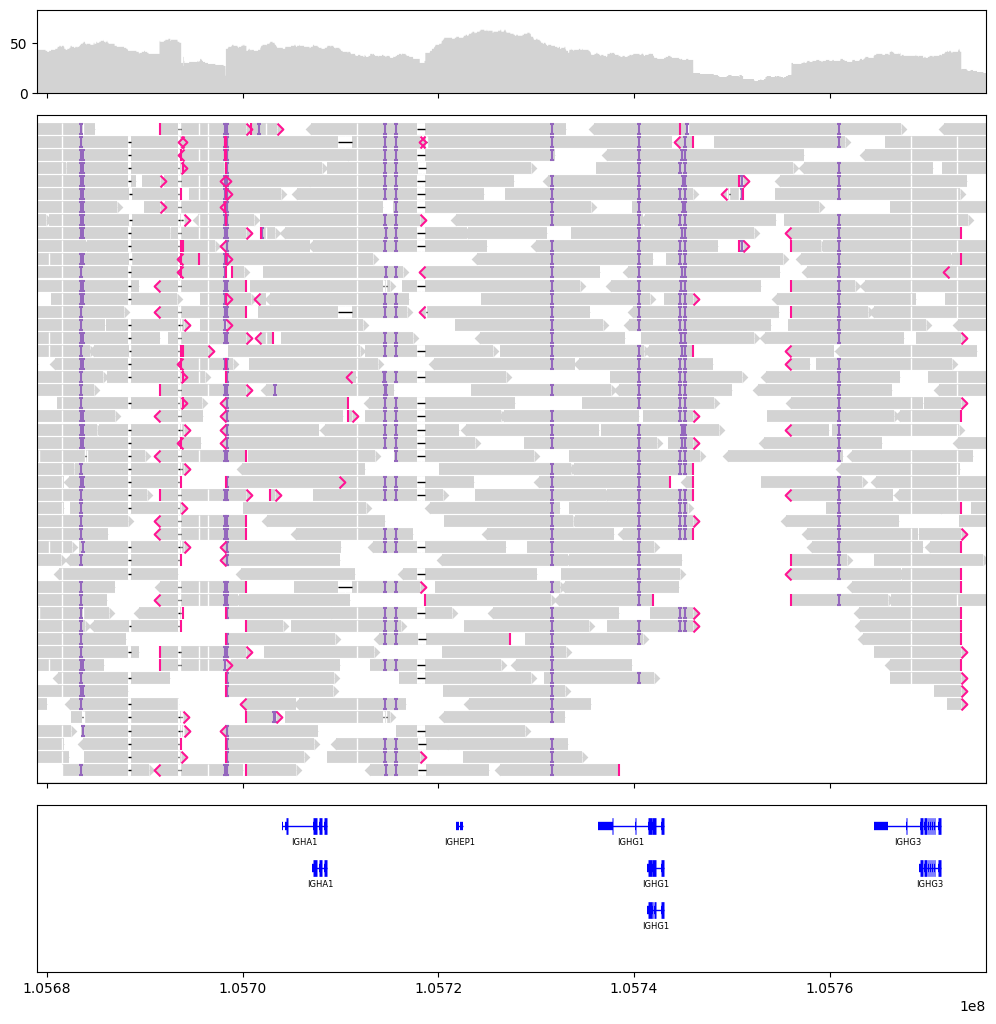

In [6]:
plt.ioff()
gv = lv.GenomeViewer(3, height_ratios=(1, 8, 2))
pacbio_painter.draw_pileup(
    gv.axes[0],
    show_mismatches=False,
)
pacbio_painter.draw_alignment(
    gv.axes[1],
    show_mismatches=False,
    order=lambda seg: -seg.query_alignment_length,
    max_depth=50,
)
gencode_painter.draw_transcripts(gv.axes[2], max_group_depth=4, labels=lambda t: t.attributes['gene_name'])

gv.set_xlim((105679000, 105776000))
gv.figure

### Linked segments

(105400000.0, 106800000.0)

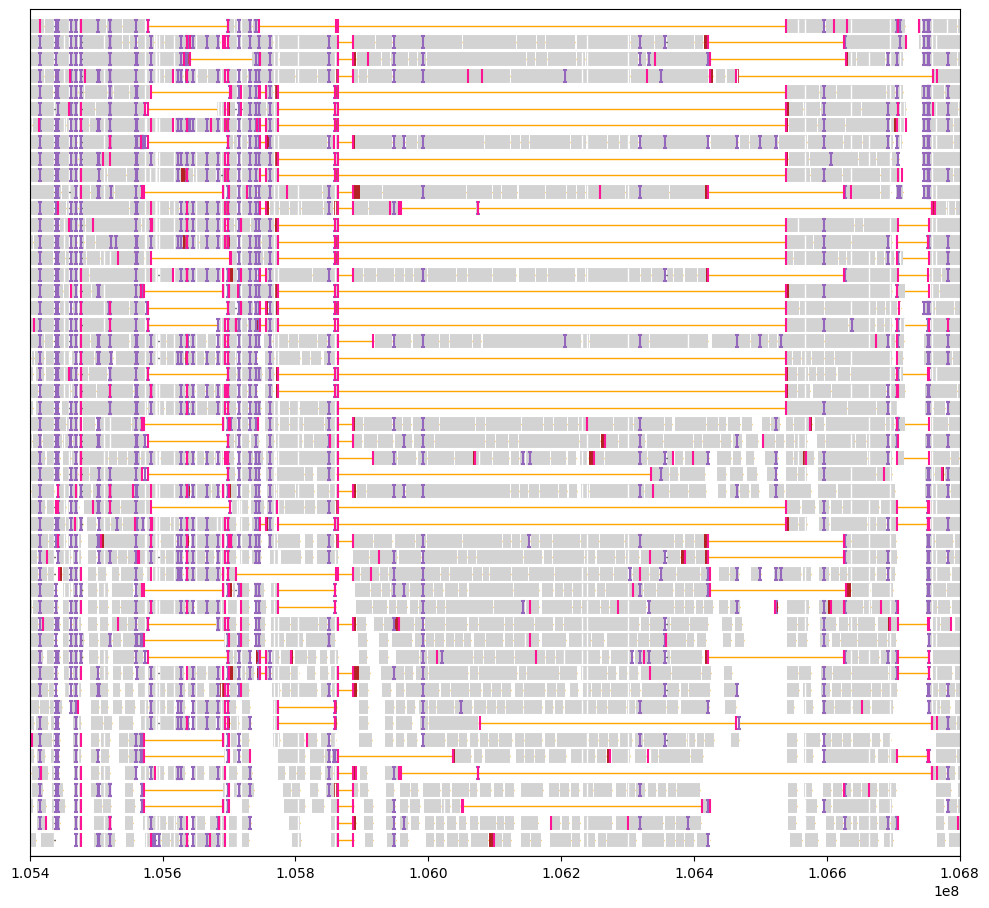

In [7]:
fig, ax = plt.subplots(figsize=(12, 11))
pacbio_painter.draw_alignment(
    ax,
    show_mismatches=False,
    show_arrowheads=False,
    links=lambda seg: seg.query_name,
    colors=lambda seg: "firebrick" if seg.is_supplementary else "lightgray",
    max_depth=50,
    links_kw=dict(color='orange', linewidth=1)
)
ax.set_xlim(105_400_000, 106_800_000)